In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# for level 5 data

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Final Year Research/Dataset/Oneplus 5T/Level 05/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    #print(file)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_green = np.array([30, 50, 76])
    high_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    res = cv2.bitwise_and(rgbImage,rgbImage, mask= mask)

    image1=cv2.resize(res, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image1=np.array(image1)
    #image1 = image1.astype('float32')
    #image1 /= 255 
    img_data_array.append(image1)
    class_name.append(5)
    i+=1
    #if(i==200):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)

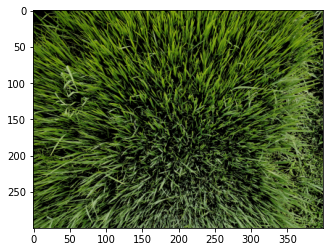

In [ ]:
#print(img_data)
#print(class_name)
plt.imshow(img_data[0])
plt.show()
#converting the list to numpy array and saving it to a file using #numpy.save
#np.save(os.path.join(path,'features'),np.array(training_data))
#with open('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy', 'w') as f:
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy',np.array([img_data]))
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy',np.array(class_name))

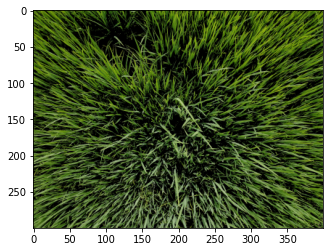

In [ ]:
#loading the saved file once again
saved = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
plt.imshow(saved[0][2])
plt.show()

In [ ]:
print(class_name)


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


# for level4 data

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Final Year Research/Dataset/Oneplus 5T/Level 04/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    #print(file)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_green = np.array([30, 50, 76])
    high_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    res = cv2.bitwise_and(rgbImage,rgbImage, mask= mask)

    image1=cv2.resize(res, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image1=np.array(image1)
    #image1 = image1.astype('float32')
    #image1 /= 255 
    img_data_array.append(image1)
    class_name.append(4)
    i+=1
    #if(i==200):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)

# appending data and save into previously created files

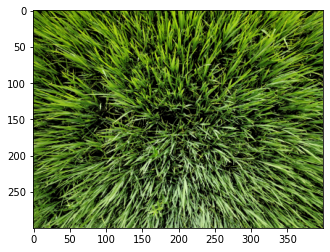

In [ ]:
#print(img_data)
#print(class_name)
#plt.imshow(img_data[0])
#plt.show()

saved1 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
saved2 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
img2=np.concatenate([saved1,[np.array(img_data)]])
class2=np.append(saved2,np.array(class_name))

plt.imshow(img2[1][10])#level4->[0][0-99] level3->[1][0-99]
plt.show()
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy',np.array(img2))
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy',np.array(class2))

388


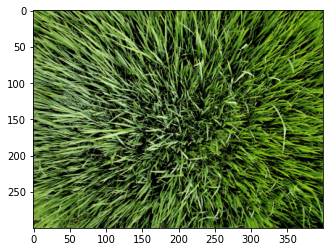

In [ ]:
saved3 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
print(saved3.size)
saved = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
plt.imshow(saved[1][99])
plt.show()


In [ ]:
print(class_name)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


#same workflow for level3


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Final Year Research/Dataset/Oneplus 5T/Level 03/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    #print(file)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_green = np.array([30, 50, 76])
    high_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    res = cv2.bitwise_and(rgbImage,rgbImage, mask= mask)

    image1=cv2.resize(res, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image1=np.array(image1)
    #image1 = image1.astype('float32')
    #image1 /= 255 
    img_data_array.append(image1)
    class_name.append(3)
    i+=1
    if(i==194):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)

#appending data and save into previously created files

In [ ]:
saved1.shape
#np.array(img_data).shape

(2, 194, 300, 400, 3)

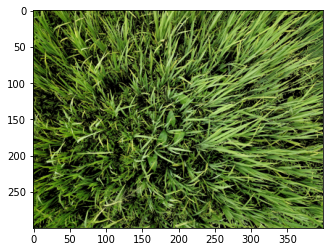

In [ ]:
#print(img_data)
#print(class_name)
#plt.imshow(img_data[0])
#plt.show()

saved1 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
saved2 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
img2=np.concatenate([saved1,[np.array(img_data)]])
class2=np.append(saved2,np.array(class_name))

plt.imshow(img2[2][10])#level4->[0][0-99] level3->[1][0-99]
plt.show()
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy',np.array(img2))
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy',np.array(class2))

582


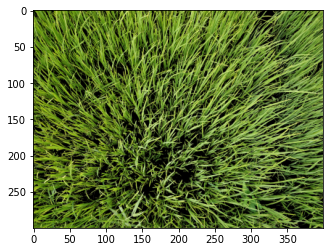

In [ ]:
saved3 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
print(saved3.size)
saved = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
plt.imshow(saved[2][99])
plt.show()



# Same workflow for level2

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Final Year Research/Dataset/Oneplus 5T/Level 02/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    #print(file)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    low_green = np.array([30, 50, 76])
    high_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    res = cv2.bitwise_and(rgbImage,rgbImage, mask= mask)

    image1=cv2.resize(res, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image1=np.array(image1)
    #image1 = image1.astype('float32')
    #image1 /= 255 
    img_data_array.append(image1)
    class_name.append(2)
    i+=1
    if(i==194):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)

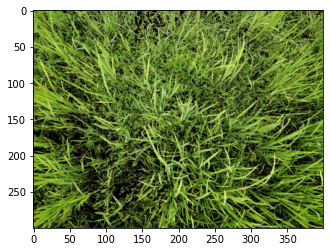

In [ ]:
#print(img_data)
#print(class_name)
#plt.imshow(img_data[0])
#plt.show()

saved1 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
saved2 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
img2=np.concatenate([saved1,[np.array(img_data)]])
class2=np.append(saved2,np.array(class_name))

plt.imshow(img2[3][10])#level5->[0][0-99] level3->[1][0-99]
plt.show()
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy',np.array(img2))
np.save('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy',np.array(class2))

776


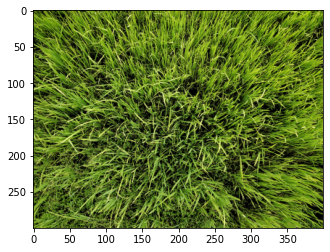

In [ ]:
saved3 = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")
print(saved3.size)
saved = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/imageArray.npy")
plt.imshow(saved[3][99])
plt.show()



In [ ]:
saved.shape

(4, 194, 300, 400, 3)